In [ ]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation, Reshape
from keras.optimizers import SGD
from keras.optimizers import Adam
from keras.layers import BatchNormalization as BN
from keras.layers import GaussianNoise as GN
from keras.callbacks import LearningRateScheduler as LRS
from keras.preprocessing.image import ImageDataGenerator


In [ ]:
batch_size = 64 #coge 128 muestas
num_classes = 10
epochs = 200 #numero de iteraciones

In [ ]:
(x_train, y_train), (x_test,y_test)=mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
x_train = x_train.reshape(60000,28,28,1)
x_test = x_test.reshape(10000,28,28,1)
x_train= x_train.astype('float32')
x_test = x_test.astype('float32')

In [ ]:
#Normalizar
x_train /= 255
x_test /= 255

In [ ]:
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

60000 train samples
10000 test samples


In [ ]:
#convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [ ]:
## Data Augmentation with an ImageGenerator
datagen = ImageDataGenerator(
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=False)

In [ ]:
#model = Sequential()
#model.add(Dense(512,activation = 'relu',input_shape =(784,)))
#model.add(Dense(512,activation = 'relu'))
#model.add(Dense(512,activation = 'relu'))
#model.add(Dense(num_classes,activation = 'softmax'))


In [ ]:
#model = Sequential()
#model.add(Dense(1024,activation = 'relu',input_shape =(784,)))
#model.add(Dense(512,activation = 'relu'))
#model.add(Dense(512,activation = 'relu'))
#model.add(Dense(128,activation = 'relu'))
#model.add(Dense(num_classes,activation = 'softmax'))

In [ ]:
## NN with BN
model = Sequential()
model.add(Reshape(target_shape=(784,), input_shape=(28,28,1)))
model.add(GN(0.1))


model.add(Dense(1024))
model.add(BN())
model.add(GN(0.1))
model.add(Activation('relu'))

model.add(Dense(1024))
model.add(BN())
model.add(GN(0.1))
model.add(Activation('relu'))


model.add(Dense(1024))
model.add(BN())
model.add(GN(0.1))
model.add(Activation('relu'))


model.add(Dense(num_classes, activation='softmax'))

In [ ]:
#model = Sequential()
#model.add(Reshape(target_shape=(784,), input_shape=(28,28,1)))
#model.add(GN(0.3))

#model.add(Dense(512))
#model.add(BN())
#model.add(GN(0.3))
#model.add(Activation('relu'))

#model.add(Dense(512))
#model.add(BN())
#model.add(GN(0.3))
#model.add(Activation('relu'))

#model.add(Dense(512))
#model.add(BN())
#model.add(GN(0.3))
#model.add(Activation('relu'))

#model.add(Dense(num_classes, activation='softmax'))


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape (Reshape)           (None, 784)               0         
                                                                 
 gaussian_noise (GaussianNoi  (None, 784)              0         
 se)                                                             
                                                                 
 dense (Dense)               (None, 1024)              803840    
                                                                 
 batch_normalization (BatchN  (None, 1024)             4096      
 ormalization)                                                   
                                                                 
 gaussian_noise_1 (GaussianN  (None, 1024)             0         
 oise)                                                           
                                                        

In [ ]:
#sgd = SGD(lr=0.01,decay=1e-6,momentum=0.9)

sgd = SGD(learning_rate=0.1, decay=0.0, momentum=0.5)

In [ ]:
## define a learning rate scheduler
def scheduler(epoch):
    if epoch < 25:
        return .1
    elif epoch < 50:
        return 0.01
    else:
        return 0.001

set_lr = LRS(scheduler)
###

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer = sgd,metrics =['accuracy'])

In [ ]:
history=model.fit(datagen.flow
                  (x_train, y_train,batch_size=batch_size),
                            steps_per_epoch=len(x_train) / batch_size, 
                            epochs=epochs,
                            validation_data=(x_test, y_test),
                            callbacks=[set_lr],
                            verbose=1)

Epoch 1/200
937/937 [==============================] - 81s 83ms/step - loss: 0.3494 - accuracy: 0.8937 - val_loss: 0.1576 - val_accuracy: 0.9520 - lr: 0.1000
Epoch 2/200
937/937 [==============================] - 73s 78ms/step - loss: 0.1869 - accuracy: 0.9433 - val_loss: 0.0935 - val_accuracy: 0.9698 - lr: 0.1000
Epoch 3/200
937/937 [==============================] - 72s 76ms/step - loss: 0.1483 - accuracy: 0.9541 - val_loss: 0.0850 - val_accuracy: 0.9733 - lr: 0.1000
Epoch 4/200
937/937 [==============================] - 72s 77ms/step - loss: 0.1256 - accuracy: 0.9613 - val_loss: 0.0651 - val_accuracy: 0.9794 - lr: 0.1000
Epoch 5/200
937/937 [==============================] - 71s 76ms/step - loss: 0.1145 - accuracy: 0.9640 - val_loss: 0.0654 - val_accuracy: 0.9800 - lr: 0.1000
Epoch 6/200
937/937 [==============================] - 71s 76ms/step - loss: 0.1032 - accuracy: 0.9669 - val_loss: 0.0729 - val_accuracy: 0.9786 - lr: 0.1000
Epoch 7/200
937/937 [==============================]

In [ ]:
#history = model.fit(x_train, y_train, batch_size = batch_size, epochs = epochs,verbose = 1,validation_data=(x_test,y_test),callbacks=[set_lr])

In [ ]:
print(history.history.keys())


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])


In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)


In [ ]:
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.021211015060544014
Test accuracy: 0.9930999875068665


In [ ]:
import matplotlib.pyplot as plt


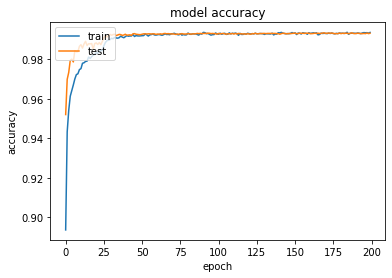

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()